<font size=6>电视剧播放量的影响因素</font>

电视剧一直是电视台播出时长最多、观众收视量最大的节目类型。电视剧的播放量既是衡量演员人气和业绩的重要指标，也是剧方招商引资的重要数据，因而备受演员粉丝、电视剧制作方及投资方等的关注。本文使用了狗熊会的某平台电视剧相关数据，试图揭示电视剧播放量的影响因素。

数据来源：http://teach.xiong99.com.cn/mooc/pub/detailCourseware/127043069563375616

In [1]:
# data analysis 
import pandas as pd
import numpy as np

# visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# visualization defaults
plt.style.use('ggplot')
sns.set_style('whitegrid')

## 数据概况

- 本数据库共有4266个条目，有剧名的共4219条，但非重复的剧名只有220个，说明这个数据库里有大量“剧名”重复的条目。这些重复条目的主要差别在于播放量、点赞、差评的数值不同，后面处理时可以对它们取平均值。
- 数据库的属性共有7个：剧名、类型、播放量、点赞、差评、得分、采集日期。
    - 类型为类别变量，播放量、点赞、差评为数值变量。采集日期对分析结果没有用。
    - “类型”属性有175条数据缺失，“得分”有16条数据缺失。
    - “类型”属性中有特殊字符“\n/\n”，需要处理。

In [2]:
df = pd.read_excel('TV_shows.xlsx', thousands=',')
df.head()

,剧名,类型,播放量,点赞,差评,得分,采集日期
0,花千骨2015,言情剧\n/\n穿越剧\n/\n网络剧,3.07亿,992342.0,357808.0,7.3,2015-9-23 23:48:48
1,还珠格格2015,古装剧\n\n/\n喜剧\n\n/\n网络剧,73.3万,2352.0,7240.0,2.5,2015-9-23 23:48:48
2,天局,武侠剧\n/\n古装剧\n/\n悬疑剧\n/\n网络剧,3454万,38746.0,3593.0,9.2,2015-9-23 23:48:52
3,明若晓溪,青春剧\n/\n言情剧\n/\n偶像剧,1.57亿,518660.0,72508.0,8.8,2015-9-23 23:48:51
4,多情江山,言情剧\n/\n古装剧\n/\n宫廷剧,1126万,22553.0,6955.0,7.6,2015-9-23 23:48:52


In [3]:
df['播放量'].dtype

dtype('O')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4266 entries, 0 to 4265
Data columns (total 7 columns):
剧名      4219 non-null object
类型      4046 non-null object
播放量     4219 non-null object
点赞      4219 non-null float64
差评      4219 non-null float64
得分      4203 non-null object
采集日期    4266 non-null object
dtypes: float64(2), object(5)
memory usage: 233.4+ KB


In [5]:
df['剧名'].dropna().nunique()

220

In [6]:
df.sort_values(by='剧名').head(10)

,剧名,类型,播放量,点赞,差评,得分,采集日期
686,wait酒吧,喜剧\n\n/\n网络剧,375万,2136.0,4366.0,3.3,2015-9-25 1:15:13
1775,wait酒吧,喜剧\n\n/\n网络剧,381万,2200.0,4414.0,3.3,2015-9-28 1:07:23
4246,wait酒吧,喜剧\n\n/\n网络剧,408万,2312.0,4550.0,3.4,2015-10-9 1:09:35
3531,wait酒吧,喜剧\n\n/\n网络剧,400万,2275.0,4521.0,3.3,2015-10-6 1:07:35
847,wait酒吧,喜剧\n\n/\n网络剧,377万,2165.0,4378.0,3.3,2015-9-26 1:08:28
481,wait酒吧,喜剧\n\n/\n网络剧,373万,2124.0,4358.0,3.3,2015-9-24 1:05:22
270,wait酒吧,喜剧\n\n/\n网络剧,373万,2123.0,4358.0,3.3,2015/9/23 23:52:51
3122,wait酒吧,喜剧\n\n/\n网络剧,394万,2257.0,4486.0,3.3,2015-10-4 1:07:29
2478,wait酒吧,喜剧\n\n/\n网络剧,388万,2242.0,4447.0,3.4,2015-10-1 1:08:38
2252,wait酒吧,喜剧\n\n/\n网络剧,385万,2230.0,4434.0,3.3,2015-9-30 1:08:39


## 数据处理
### 缺失数据

“采集日期”对分析结果没有帮助，可删除。空条目没有意义，也可删除。

In [7]:
# 去除“采集日期”一列
df.drop('采集日期', axis=1, inplace=True)

# 删除各个属性均为空的条目
df.dropna(axis=0, how='all', inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 0 to 4265
Data columns (total 6 columns):
剧名     4219 non-null object
类型     4046 non-null object
播放量    4219 non-null object
点赞     4219 non-null float64
差评     4219 non-null float64
得分     4203 non-null object
dtypes: float64(2), object(4)
memory usage: 230.7+ KB


“类型”和“得分”还剩下少量空数据，后面分析了再处理。

### 播放量

播放量的数据类型为str，需将它们同一转换为数值类型。

In [9]:
# 提取播放量中的单位
df['单位'] = df['播放量'].str.extract('([\u4e00-\u9fa5])', expand=False)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4219 entries, 0 to 4265
Data columns (total 7 columns):
剧名     4219 non-null object
类型     4046 non-null object
播放量    4219 non-null object
点赞     4219 non-null float64
差评     4219 non-null float64
得分     4203 non-null object
单位     4212 non-null object
dtypes: float64(2), object(5)
memory usage: 263.7+ KB


In [11]:
df['单位'].value_counts()

万    2360
亿    1852
Name: 单位, dtype: int64

从上图中可以看到，4219个条目中仅有7个条目没有单位。回到原始数据查看和这些条目剧名相同的其它条目，发现它们的播放量都是百万以上，说明这些没有“单位”的条目数据有问题。由于相同剧名的条目还很多，所以我选择直接删除这些有问题的条目。

In [12]:
# 查看没有单位的剧
df[df['单位'].isnull()]

,剧名,类型,播放量,点赞,差评,得分,单位
393,夺宝传奇,年代剧\n\n/\n悬疑剧,1325,13.0,4.0,7.6,NaN
885,孤雁,言情剧\n\n/\n年代剧,1388,18.0,0.0,10.0,NaN
965,孤雁,言情剧\n\n/\n年代剧,2668,20.0,2.0,9.1,NaN
1612,飞虎队,年代剧\n\n/\n军旅剧,12525,34.0,8.0,8.1,NaN
2049,青春集结号,青春剧\n\n/\n军旅剧,13309,64.0,14.0,8.2,NaN
2110,青春集结号未删减版,青春剧\n\n/\n军旅剧,1285,13.0,0.0,10.0,NaN
2339,青春集结号未删减版,青春剧\n/\n军旅剧,85128,210.0,68.0,7.6,NaN


In [13]:
df.dropna(axis=0, subset=['单位'], inplace=True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4212 entries, 0 to 4265
Data columns (total 7 columns):
剧名     4212 non-null object
类型     4039 non-null object
播放量    4212 non-null object
点赞     4212 non-null float64
差评     4212 non-null float64
得分     4196 non-null object
单位     4212 non-null object
dtypes: float64(2), object(5)
memory usage: 263.2+ KB


将播放量转为数值，单位统一为“万”。

In [15]:
def Plays(cols):
    number = float(cols[0][:-1]) 
    unit = cols[1]
    if unit == '亿':
        number = float(number) * 10000
        unit = '万'
    return number

df['播放量'] = df[['播放量', '单位']].apply(Plays, axis=1)

In [16]:
df.head()

,剧名,类型,播放量,点赞,差评,得分,单位
0,花千骨2015,言情剧\n/\n穿越剧\n/\n网络剧,30700.0,992342.0,357808.0,7.3,亿
1,还珠格格2015,古装剧\n\n/\n喜剧\n\n/\n网络剧,73.3,2352.0,7240.0,2.5,万
2,天局,武侠剧\n/\n古装剧\n/\n悬疑剧\n/\n网络剧,3454.0,38746.0,3593.0,9.2,万
3,明若晓溪,青春剧\n/\n言情剧\n/\n偶像剧,15700.0,518660.0,72508.0,8.8,亿
4,多情江山,言情剧\n/\n古装剧\n/\n宫廷剧,1126.0,22553.0,6955.0,7.6,万


### 得分

In [17]:
df["得分"] = pd.to_numeric(df["得分"],errors='coerce', downcast='float')

In [18]:
df[df['得分'].isnull()]

,剧名,类型,播放量,点赞,差评,得分,单位
244,大刀记,军旅剧,26800.0,0.0,0.0,NaN,亿
539,鸳鸯佩,言情剧\n\n/\n年代剧,26500.0,0.0,0.0,NaN,亿
628,克拉恋人,青春剧\n/\n言情剧\n/\n偶像剧,277900.0,0.0,0.0,NaN,亿
631,淑女涩男,青春剧,17600.0,0.0,0.0,NaN,亿
2167,坐88路车回家,言情剧,7924.0,0.0,0.0,NaN,万
2183,好大一个家,家庭剧,12800.0,0.0,0.0,NaN,亿
2602,白衣校花与大长腿2番外篇,言情剧\n\n/\n偶像剧,1071.0,0.0,0.0,NaN,万
2609,成人记2,偶像剧\n/\n网络剧\n/\n青春剧,397.0,0.0,0.0,NaN,万
2610,云中歌,言情剧\n/\n古装剧\n/\n偶像剧\n/\n宫廷剧\n/\n青春剧,43900.0,0.0,0.0,NaN,亿
2728,爱情不打烊,言情剧,4115.0,0.0,0.0,NaN,万


从上面的表格中可以看出，得分为NaN的同时其点赞和差评也为零，这些大概率是错误数据，我选择删除这部分数据。

In [19]:
df.dropna(axis=0, subset=['得分'],inplace=True)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4171 entries, 0 to 4265
Data columns (total 7 columns):
剧名     4171 non-null object
类型     4000 non-null object
播放量    4171 non-null float64
点赞     4171 non-null float64
差评     4171 non-null float64
得分     4171 non-null float32
单位     4171 non-null object
dtypes: float32(1), float64(3), object(3)
memory usage: 244.4+ KB


### 类型

查看数据，电视剧“类型”主要有：言情剧, 军旅剧, 青春剧, 家庭剧, 喜剧, 年代剧, 谍战剧, 网络剧, 偶像剧, 历史剧, 古装剧, 悬疑剧, 罪案剧, 农村剧, 神话剧, 武侠剧, 宫廷剧, 穿越剧。

对各个类型加设对应的特征名，然后统计电视剧的类型。

In [21]:
# 删除“类型”为null的条目
df.dropna(axis=0, subset=['类型'], inplace=True)

In [22]:
types = '言情剧,军旅剧,青春剧,家庭剧,喜剧,年代剧,谍战剧,网络剧,偶像剧,历史剧,古装剧,悬疑剧,罪案剧,农村剧,神话剧,武侠剧,宫廷剧,穿越剧'
for e in types.split(','):
    df[e] = df['类型'].apply(lambda x: e in x)
df.head()

,剧名,类型,播放量,点赞,差评,得分,单位,言情剧,军旅剧,青春剧,...,偶像剧,历史剧,古装剧,悬疑剧,罪案剧,农村剧,神话剧,武侠剧,宫廷剧,穿越剧
0,花千骨2015,言情剧\n/\n穿越剧\n/\n网络剧,30700.0,992342.0,357808.0,7.3,亿,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,还珠格格2015,古装剧\n\n/\n喜剧\n\n/\n网络剧,73.3,2352.0,7240.0,2.5,万,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,天局,武侠剧\n/\n古装剧\n/\n悬疑剧\n/\n网络剧,3454.0,38746.0,3593.0,9.2,万,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,明若晓溪,青春剧\n/\n言情剧\n/\n偶像剧,15700.0,518660.0,72508.0,8.8,亿,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,多情江山,言情剧\n/\n古装剧\n/\n宫廷剧,1126.0,22553.0,6955.0,7.6,万,True,False,False,...,False,False,True,False,False,False,False,False,True,False


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 4265
Data columns (total 25 columns):
剧名     4000 non-null object
类型     4000 non-null object
播放量    4000 non-null float64
点赞     4000 non-null float64
差评     4000 non-null float64
得分     4000 non-null float32
单位     4000 non-null object
言情剧    4000 non-null bool
军旅剧    4000 non-null bool
青春剧    4000 non-null bool
家庭剧    4000 non-null bool
喜剧     4000 non-null bool
年代剧    4000 non-null bool
谍战剧    4000 non-null bool
网络剧    4000 non-null bool
偶像剧    4000 non-null bool
历史剧    4000 non-null bool
古装剧    4000 non-null bool
悬疑剧    4000 non-null bool
罪案剧    4000 non-null bool
农村剧    4000 non-null bool
神话剧    4000 non-null bool
武侠剧    4000 non-null bool
宫廷剧    4000 non-null bool
穿越剧    4000 non-null bool
dtypes: bool(18), float32(1), float64(3), object(3)
memory usage: 304.7+ KB


In [24]:
df.head()

,剧名,类型,播放量,点赞,差评,得分,单位,言情剧,军旅剧,青春剧,...,偶像剧,历史剧,古装剧,悬疑剧,罪案剧,农村剧,神话剧,武侠剧,宫廷剧,穿越剧
0,花千骨2015,言情剧\n/\n穿越剧\n/\n网络剧,30700.0,992342.0,357808.0,7.3,亿,True,False,False,...,False,False,False,False,False,False,False,False,False,True
1,还珠格格2015,古装剧\n\n/\n喜剧\n\n/\n网络剧,73.3,2352.0,7240.0,2.5,万,False,False,False,...,False,False,True,False,False,False,False,False,False,False
2,天局,武侠剧\n/\n古装剧\n/\n悬疑剧\n/\n网络剧,3454.0,38746.0,3593.0,9.2,万,False,False,False,...,False,False,True,True,False,False,False,True,False,False
3,明若晓溪,青春剧\n/\n言情剧\n/\n偶像剧,15700.0,518660.0,72508.0,8.8,亿,True,False,True,...,True,False,False,False,False,False,False,False,False,False
4,多情江山,言情剧\n/\n古装剧\n/\n宫廷剧,1126.0,22553.0,6955.0,7.6,万,True,False,False,...,False,False,True,False,False,False,False,False,True,False


### 剧名

按剧名对数据条目进行合并，其播放量、点赞、差评、得分均取该剧的平均值

In [25]:
df2 = df.groupby('剧名').mean()

## 模型拟合

训练一个线性回归模型，查看各个特征对预测结果的影响。

### 训练模型

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve, cross_validate, train_test_split

In [27]:
# 特征归一化
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()

for e in ['播放量', '点赞', '差评', '得分']:
    tmp = scaler.fit(df2[e].values.reshape(-1,1))
    df2[e] = scaler.fit_transform(df2[e].values.reshape(-1,1), tmp)

In [28]:
X = df2[['点赞', '差评', '得分', '言情剧', '军旅剧', '青春剧', '家庭剧', '喜剧', '年代剧', '谍战剧',
       '网络剧', '偶像剧', '历史剧', '古装剧', '悬疑剧', '罪案剧', '农村剧', '神话剧', '武侠剧', '宫廷剧',
       '穿越剧']]
y = df2['播放量']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [30]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 拟合结果

In [31]:
pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])

,Coefficient
点赞,0.490658
差评,0.437583
得分,0.048938
言情剧,0.081546
军旅剧,-0.003286
青春剧,-0.218185
家庭剧,-0.155283
喜剧,0.049708
年代剧,0.022611
谍战剧,-0.063758


从模型系数可以看出：

- 点赞数越多，差评越多，电视剧播放量越高。
- 得分和电视剧播放量没什么关系。
- 言情剧、喜剧、年代剧、神话剧、农村剧相对受欢迎，青春剧、家庭剧、网络剧最不受欢迎。

### 模型评估

In [32]:
predictions = lm.predict(X_test)

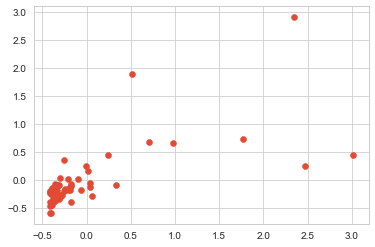

In [33]:
plt.scatter(y_test, predictions)

从上图中可以看出，当播放量很大时，模型的预测结果不是很准确，说明一部电视剧的大爆是具有偶然性的。

In [34]:
from sklearn import metrics

In [35]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.26193799724897493
MSE: 0.2649853819596232
RMSE: 0.5147673085575881


从RMSE可知，模型的预测误差在0.5左右。

## 改进想法

- 这个数据库的数据不是很全面，因而使得模型的预测效果有限。可以进一步抓取电视剧的制作公司、导演、主演、播放时段、播放频道等信息，这些对电视剧的播放量影响也是很关键的。
- 在上面的数据处理中，将电视剧“类型”分为了18类，使得关于类型的数据极其分散，肯定在一定程度上降低了预测效果。后面应该找到更简单的分类手段。